In [1]:
import numpy as np
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

In [2]:
from numpy import array

with open('../deepracer-k1999-race-lines/outer-border-populated/2022_september_open-cubspl-5.47-2023-01-21-235120.py', 'r') as file:
    deserialized = eval(file.read())
outer_border = deserialized

with open('../deepracer-k1999-race-lines/racelines-populated/2022_september_open-cubspl-5.47-2023-01-22-013945.py', 'r') as file:
    deserialized = eval(file.read())
raceline = deserialized

with open('../deepracer-k1999-race-lines/inner-border-populated/2022_september_open-cubspl-5.47-2023-01-21-235159.py', 'r') as file:
    deserialized = eval(file.read())
inner_border = deserialized

In [6]:
params = {
    'steps': 0,
    'x': 0,
    'y': 0,
    'heading': 0,
    'steering_angle': 0,
    'speed': 0,
    'all_wheels_on_track': 0,
    'progress': 0,
    'closest_waypoint': 0,
    'track_width': 1.0668,
    'reward': 0
}

x_axis = "x"
x_left = -2
x_right = 2
y_axis = "y"
y_left = 2
y_right = 6

quality = 300
reward = np.zeros((quality, quality))

x_vals = np.linspace(start=x_left, stop=x_right, num=quality)
y_vals = np.linspace(start=y_left, stop=y_right, num=quality)

outer_coords = outer_border[(outer_border[:, 0] > x_left) & (outer_border[:, 0] < x_right) & (outer_border[:, 1] > y_left) & (outer_border[:, 1] < y_right)]
inner_coords = inner_border[(inner_border[:, 0] > x_left) & (inner_border[:, 0] < x_right) & (inner_border[:, 1] > y_left) & (inner_border[:, 1] < y_right)]
rline_coords = raceline[(raceline[:, 0] > x_left) & (raceline[:, 0] < x_right) & (raceline[:, 1] > y_left) & (raceline[:, 1] < y_right)]

/var/folders/lg/g300yg4s1fzcn46rh60dn9nw0000gn/T/ipykernel_49910/2143346048.py:32: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  fig.colorbar(graph)


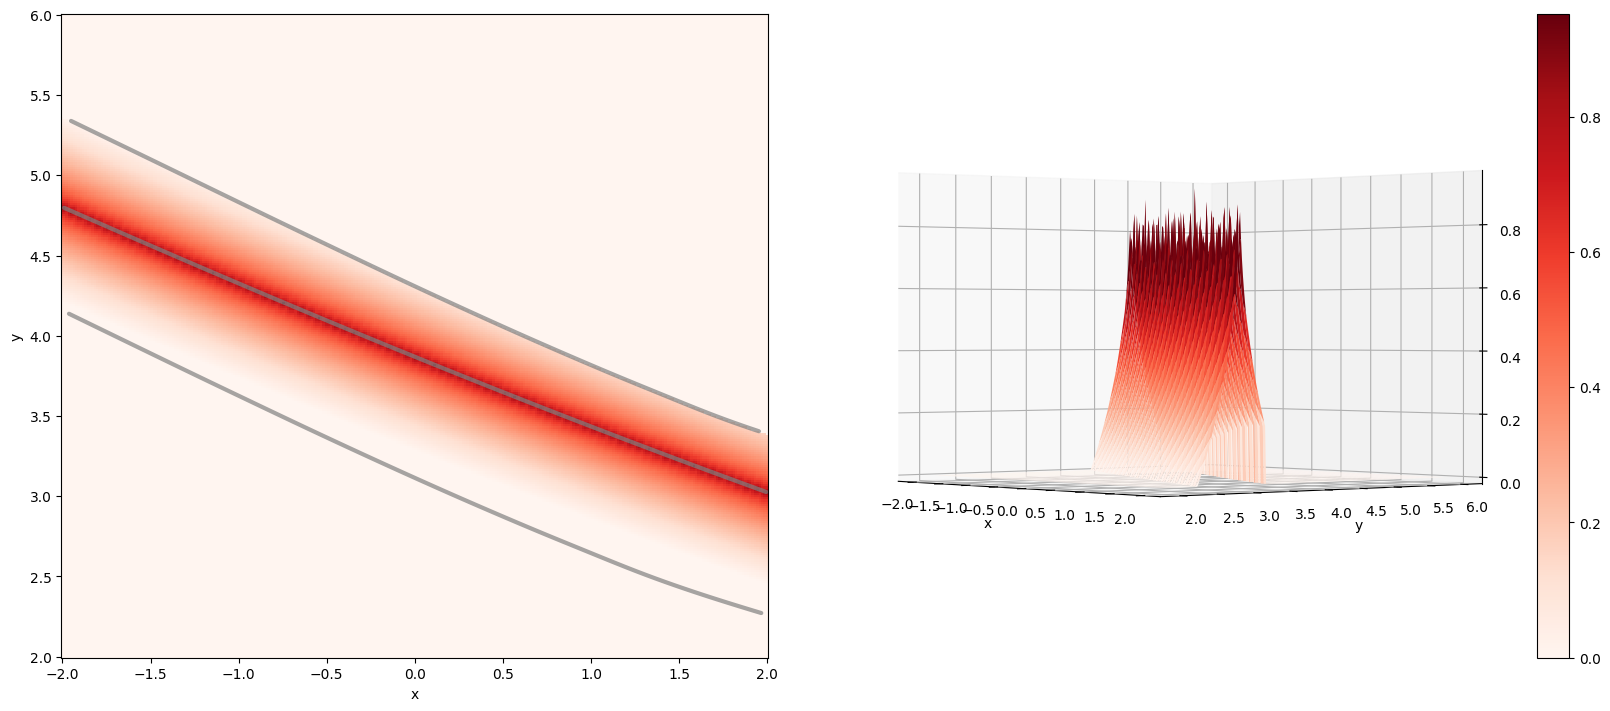

In [9]:
from test_reward_shape import reward_shape

for i, y in enumerate(y_vals):
    for j, x in enumerate(x_vals):
        params[x_axis] = x
        params[y_axis] = y
        reward[i, j] = reward_shape(params)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 7), layout='constrained')

ax = axes[0]
graph = ax.pcolor(x_vals, y_vals, reward, cmap='Reds')
ax.plot(outer_coords[:, 0], outer_coords[:, 1], color='gray', alpha=0.7, linewidth=3, solid_capstyle='round', zorder=2)
ax.plot(inner_coords[:, 0], inner_coords[:, 1], color='gray', alpha=0.7, linewidth=3, solid_capstyle='round', zorder=2)
ax.plot(rline_coords[:, 0], rline_coords[:, 1], color='gray', alpha=0.7, linewidth=3, solid_capstyle='round', zorder=2)
ax.set_ylabel(y_axis)
ax.set_xlabel(x_axis)

axes[1].remove()
ax_3d = fig.add_subplot(122, projection='3d')

x_coords, y_coords = np.meshgrid(x_vals, y_vals)

surf = ax_3d.plot_surface(x_coords, y_coords, reward, shade=reward, linewidth=0, cmap='Reds')

ax_3d.set_ylabel(y_axis)
ax_3d.set_xlabel(x_axis)
ax_3d.set_zlabel('reward')

ax_3d.view_init(0, 320)

fig.colorbar(graph)
plt.show()